<a href="https://colab.research.google.com/github/tapasya27/Python-for-Data-Analysis/blob/main/INFO371_Week1_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFO 371: Data Mining Applications

## Week 1: Using Jupyter Notebook and Python Libraries
### Prof. Y. An, PhD
### College of Computing and Informatics, Drexel University

# Markdown Examples
1. headings
2. ordered list

- unordered list
- bold **text**
- italic *text*

Hyperlink: [google colab](https://colab.research.google.com/notebooks/intro.ipynb)

Insert an image: ![images for classification](https://i.imgur.com/uNs9XYk.png)

# Python tutorials:
w3schools Python tutorial: https://www.w3schools.com/python/default.asp

w3schools Pandas tutorial: https://www.w3schools.com/python/pandas/

# Import the common packages

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

# Mount your Google Drive to this notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Find the path of the file on the Google Drive

In [ ]:
file = "/content/drive/MyDrive/Colab Notebooks/courses/INFO371/iris.csv"

# Load the data into a DataFrame

In [ ]:
iris = pd.read_csv(file)

# Show the first 5 rows of the DataFrame

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Show the size of the DataFrame

In [ ]:
iris.shape

(150, 5)

# Show some descriptive statistics

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Show Info

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Some Common Data Extraction and Manipulation Operations

In [ ]:
# get the value at row 3, column 2
iris.iloc[2, 1]

3.2

In [ ]:
# what is the species of the 58th instance?
iris.iloc[57].species

'versicolor'

In [ ]:
# get all species
iris.species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [ ]:
# what are the unique species?
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
# convert the species to numbers 0, 1, 2 by the mapping setosa:1, versicolor:1, virginica:2
species_num = {'setosa':0, 'versicolor':1, 'virginica':2}
iris.species.map(species_num)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [ ]:
# add a new column 
iris['label'] = iris.species.map(species_num)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,label
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


# Exploratory Data Analysis

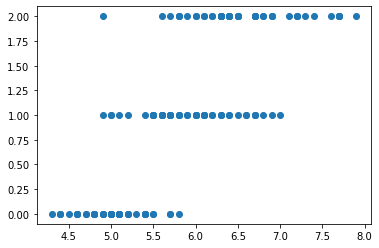

In [ ]:
# plot the relationships between individual features and the species
plt.scatter(iris.sepal_length, iris.label)

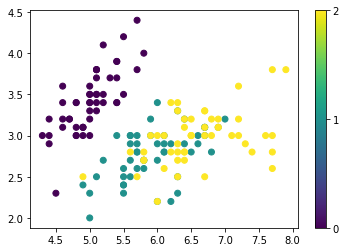

In [ ]:
plt.scatter(iris.loc[:, 'sepal_length'], iris.loc[:, 'sepal_width'], c=iris.label)
plt.colorbar(ticks=[0, 1, 2])

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


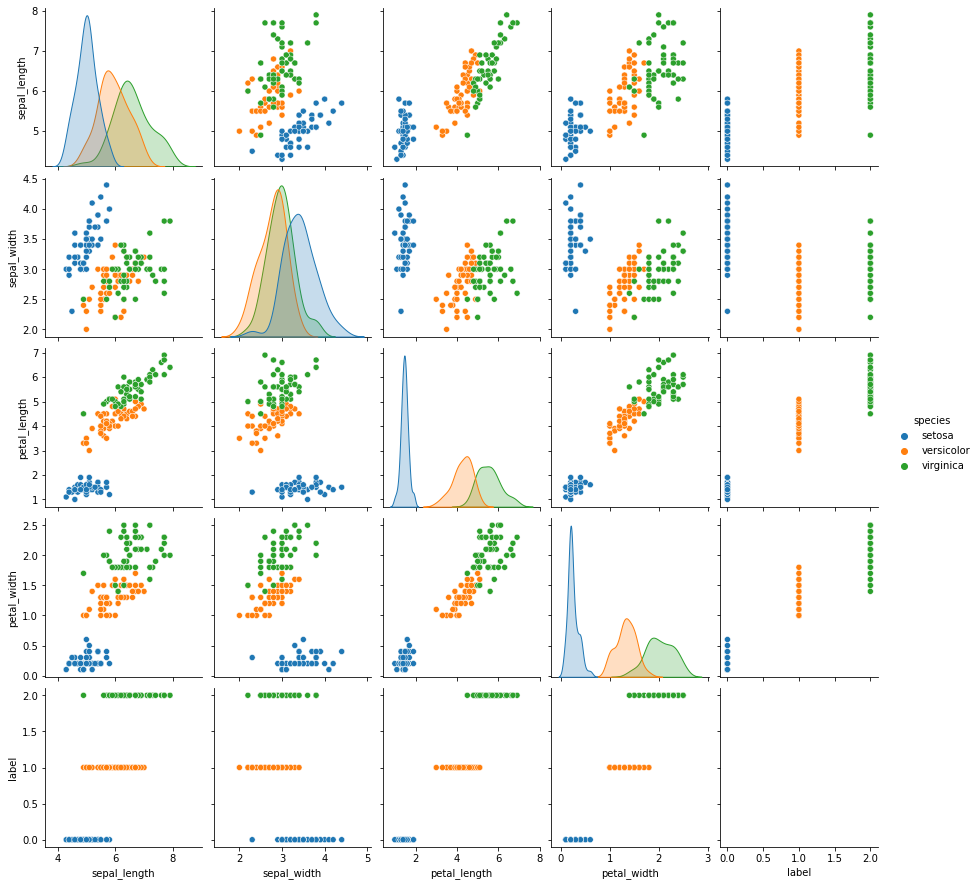

In [ ]:
sns.pairplot(iris, hue='species')

# Classification

In [ ]:
# import the K-Nearest Neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Create a KNN classifier
knn = KNeighborsClassifier()

In [ ]:
# Extract the training features
X = iris.drop(['species', 'label'], axis = 1)
X.shape

(150, 4)

In [ ]:
# Extract the target
y = iris['label']
y.shape

(150,)

In [ ]:
# fit the model
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# predict on the features
preds = knn.predict(X)

In [ ]:
# import the metrics
from sklearn.metrics import accuracy_score

In [ ]:
# evaluate the model accuracy on the training data
accuracy_score(y, preds)

0.9666666666666667